# An Analysis of Political Contributions During the 2020 House of Representatives Election, Part 2

Now, you'll take the data that you gathered and analyze it, presenting your results at the end.

### Part 2: Exploratory Data Analysis
Using your scraped data, investigates different relationships between candidates and the amount of money they raised. Here are some suggestions to get you started, but feel free to pose you own questions or do additional exploration:  
    a. How often does the candidate who raised more money win a race?  
    b. How often does the candidate who spent more money win a race?  
    c. Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race?  
    d. How often does the incumbent candidate win a race?  
    e. Can you detect any relationship between amount of money raised and the incumbent status of a candidate?

### Part 3: Statistical Modeling
Fit a logistic regression model to see if the amount spent has a statistically significant impact on the probability of winning an election.  
Feel free to brainstorm ways to set up your model, but a suggestion to get started would be to calculate, for each candidate, the percentage of to total amount spent in their race that was spent by them and use this as your predictor variable of interest. Hint: you may find the `transform` method (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html) in combination with `groupby` useful to find the total spending by race.  
Don't forget to include the incumbent variable in your model.  
After fitting your model, interpret the meaning of the coefficients you get.  


## Deliverable

Prepare a 10-12 minute presentation of your findings. This presentation should focus on the exploratory analysis and statistical modeling portions of this project and not on the webscraping components. Thus, you should not include any code in your presenation. Your presentation should be done using PowerPoint/Google Slides or other presentation software.

In [1]:
import tqdm
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
election = pd.read_csv("../data/All_2020_Election_Data.csv")

In [3]:
election.head(10)
election['ResultCRPICO'] = election['Result'] + election['CRPICO']
election['Result'] = election['Result'].str.lower()
election

,State_Abbreviation,District,cid,FirstLast,Party,Rcpts,Spent,PACs,Indivs,Cand,...,CRPICO,State,IncCID,Incumbent,primarydate,DistIDCurr,capeye,sort,SmLgIndivsNote,ResultCRPICO
0,AL,1,N00044245,Jerry Carl,R,1971321.50,1859348.91,387000.00,1044195.95,434655.50,...,O,Alabama,NaN,NaN,2020-03-03 00:00:00 +0000,,0,2,N,WO
1,AL,1,N00044750,James Averhart,D,80094.95,78973.24,0.00,50849.95,29245.00,...,O,Alabama,NaN,NaN,2020-03-03 00:00:00 +0000,,0,2,N,LO
2,AL,2,N00041295,Barry Moore,R,650806.75,669367.70,230281.65,408536.20,11500.00,...,O,Alabama,NaN,NaN,2020-03-03 00:00:00 +0000,,0,2,N,WO
3,AL,2,N00045944,Phyllis Harvey-Hall,D,56049.68,55988.07,2032.00,42411.95,10575.41,...,O,Alabama,NaN,NaN,2020-03-03 00:00:00 +0000,,0,2,N,LO
4,AL,2,N00045631,John Page,L,0.00,0.00,0.00,0.00,0.00,...,O,Alabama,NaN,NaN,2020-03-03 00:00:00 +0000,NaN,0,2,N,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,WY,1,N00035504,Liz Cheney,R,3003883.34,3060166.78,1292490.00,1169995.46,0.00,...,I,Wyoming,NaN,NaN,2020-08-18 00:00:00 +0000,WY01,0,1,N,WI
1260,WY,1,N00047272,Lynnette Grey Bull,D,134597.32,132234.75,2800.00,130197.32,0.00,...,C,Wyoming,NaN,NaN,2020-08-18 00:00:00 +0000,,0,2,N,LC
1261,WY,1,N00047207,Zoilo Adalia,3,0.00,0.00,0.00,0.00,0.00,...,C,Wyoming,NaN,NaN,2020-08-18 00:00:00 +0000,NaN,0,2,N,C
1262,WY,1,N00035139,Richard Brubaker,L,0.00,0.00,0.00,0.00,0.00,...,C,Wyoming,NaN,NaN,2020-08-18 00:00:00 +0000,NaN,0,2,N,C


In [4]:
election.groupby(['State_Abbreviation','District'])['ResultCRPICO'].value_counts().reset_index().head(50)

,State_Abbreviation,District,ResultCRPICO,count
0,AK,1,C,1
1,AK,1,WI,1
2,AK,1,LC,1
3,AL,1,LO,1
4,AL,1,WO,1
5,AL,2,O,1
6,AL,2,LO,1
7,AL,2,WO,1
8,AL,3,LC,1
9,AL,3,WI,1


In [23]:
wins = election.groupby('Result')['CRPICO'].value_counts().reset_index()
wins = wins[wins['Result'] == 'w']
total = wins['count'].sum()
wins['Percentage'] = wins['count'] / total
wins['CRPICO'].replace({"I":"Incumbent","O":"Open Seat Candidate","C":"Challenger"}, inplace = True)
wins
incumbent_percentage = wins[wins['CRPICO'] == 'Incumbent']['Percentage'].iloc[0] * 100
print(f"The percentage of winners that were incumbents was {incumbent_percentage:.2f}%")

The percentage of winners that were incumbents was 86.14%


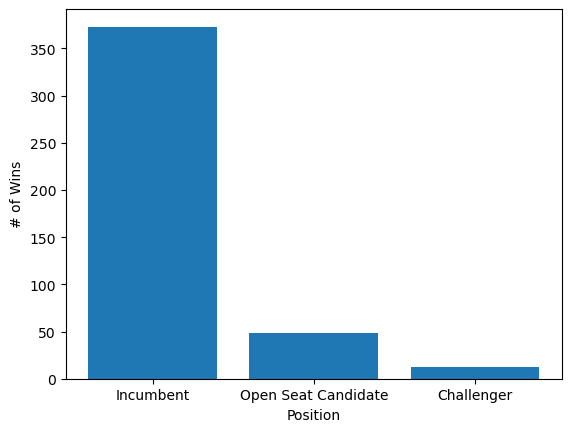

In [20]:
plt.bar(wins['CRPICO'],wins['count'])
plt.xlabel('Position')
plt.ylabel('# of Wins')
plt.show()

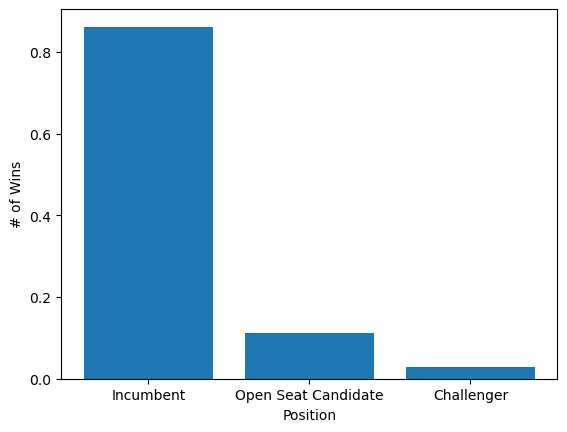

In [16]:
plt.bar(wins['CRPICO'],wins['Percentage'])
plt.xlabel('Position')
plt.ylabel('# of Wins')
plt.show()